# Purpose

Begin to learn scikit-fem by examining code from the first example.

In [27]:
# Code

In [1]:
from skfem import MeshTri, Basis, ElementTriP1, BilinearForm, LinearForm, enforce, solve
from skfem.helpers import dot, grad


In [2]:
# create the mesh
mesh = MeshTri().refined(4)
# or, with your own points and elements:
# mesh = MeshTri(points, elements)

basis = Basis(mesh, ElementTriP1())


@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))


@LinearForm
def rhs(v, _):
    return 1.0 * v


A = laplace.assemble(basis)
b = rhs.assemble(basis)

# Dirichlet boundary conditions
A, b = enforce(A, b, D=mesh.boundary_nodes())

# solve the linear system
x = solve(A, b)

# plot using matplotlib
# mesh.plot(x, shading="gouraud", colorbar=True).show()
# # or, save to external file:
# mesh.save("output.vtk", point_data={"solution": x})


# Look at various objects

## Solution `x`

In [9]:
print(type(x), x.shape)

<class 'numpy.ndarray'> (289,)


## `mesh` and `Basis`

In [10]:
print(mesh)

<skfem MeshTri1 object>
  Number of elements: 512
  Number of vertices: 289
  Number of nodes: 289
  Named boundaries [# facets]: left [16], bottom [16], right [16], top [16]


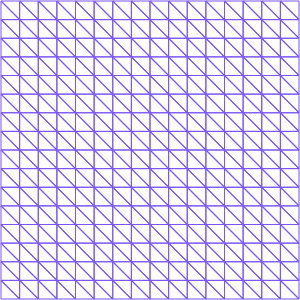

In [5]:
mesh

In [11]:
print(basis)

<skfem CellBasis(MeshTri1, ElementTriP1) object>
  Number of elements: 512
  Number of DOFs: 289
  Size: 110592 B


In [12]:
basis

<skfem CellBasis(MeshTri1, ElementTriP1) object>
  Number of elements: 512
  Number of DOFs: 289
  Size: 110592 B

# MeshTri

In [26]:
MeshTri?

Init signature:
MeshTri(
    doflocs: numpy.ndarray = <factory>,
    t: numpy.ndarray = <factory>,
    _boundaries: Optional[Dict[str, numpy.ndarray]] = None,
    _subdomains: Optional[Dict[str, numpy.ndarray]] = None,
    elem: Type[skfem.element.element.Element] = <class 'skfem.element.element_tri.element_tri_p1.ElementTriP1'>,
    affine: bool = True,
    sort_t: bool = True,
    validate: bool = True,
) -> None
Docstring:      A standard first-order triangular mesh.
File:           ~/micromamba/envs/scikit-fem/lib/python3.12/site-packages/skfem/mesh/mesh_tri_1.py
Type:           type
Subclasses:     MeshTri2, MeshTri1DG

<skfem MeshTri1 object>
  Number of elements: 2
  Number of vertices: 4
  Number of nodes: 4
  Named boundaries [# facets]: left [1], bottom [1], right [1], top [1]


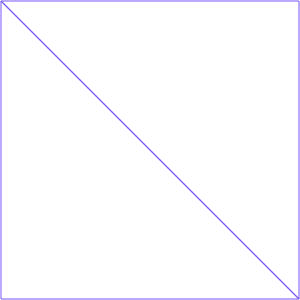

In [25]:
m = MeshTri()
print(m)
m

In [23]:
Basis(m, ElementTriP1())

<skfem CellBasis(MeshTri1, ElementTriP1) object>
  Number of elements: 2
  Number of DOFs: 4
  Size: 432 B

<skfem MeshTri1 object>
  Number of elements: 8
  Number of vertices: 9
  Number of nodes: 9
  Named boundaries [# facets]: left [2], bottom [2], right [2], top [2]


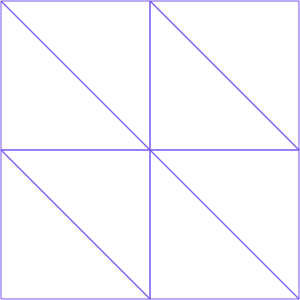

In [20]:
m1 = MeshTri().refined(1)
print(m1)
m1

In [24]:
Basis(m1, ElementTriP1())

<skfem CellBasis(MeshTri1, ElementTriP1) object>
  Number of elements: 8
  Number of DOFs: 9
  Size: 1728 B

<skfem MeshTri1 object>
  Number of elements: 32
  Number of vertices: 25
  Number of nodes: 25
  Named boundaries [# facets]: left [4], bottom [4], right [4], top [4]


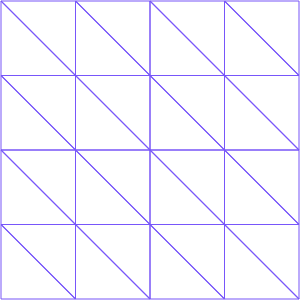

In [21]:
m2 = MeshTri().refined(2)
print(m2)
m2

<skfem MeshTri1 object>
  Number of elements: 128
  Number of vertices: 81
  Number of nodes: 81
  Named boundaries [# facets]: left [8], bottom [8], right [8], top [8]


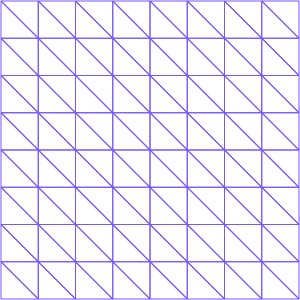

In [22]:
m3 = MeshTri().refined(3)
print(m3)
m3